In [3]:
import yfinance as yf
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Function to calculate Black-Scholes Greeks (Delta and Vega)
def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        delta = norm.cdf(d1)
        vega = S * norm.pdf(d1) * np.sqrt(T)
    else:
        delta = -norm.cdf(-d1)
        vega = S * norm.pdf(d1) * np.sqrt(T)
    return delta, vega

# Fetch historical stock prices for AAPL and MSFT
aapl = yf.Ticker("AAPL").history(period="1y")['Close']
msft = yf.Ticker("MSFT").history(period="1y")['Close']
usdsgd = 1.35  # Placeholder for USDSGD exchange rate

# Calculate option Greeks for AAPL and MSFT
delta_aapl, vega_aapl = black_scholes_greeks(S=aapl[-1], K=150, T=0.5, r=0.02, sigma=0.3, option_type='call')
delta_msft, vega_msft = black_scholes_greeks(S=msft[-1], K=300, T=0.5, r=0.02, sigma=0.3, option_type='put')

# Calculate portfolio value
portfolio_value = 0.5 * aapl[-1] + 0.3 * msft[-1] - 0.2 * vega_aapl - (0.1 * delta_msft / usdsgd)

# Calculate 14-day Rate of Change (Momentum) for AAPL
roc_aapl = (aapl[-1] - aapl[-15]) / aapl[-15]

# Plot AAPL price trend and save as an image
plt.figure(figsize=(10, 6))
plt.plot(aapl.index[-100:], aapl[-100:], label='AAPL Price', color='blue')
plt.title('AAPL Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
image_path = "./data/aapl_momentum.png"
plt.savefig(image_path)
plt.close()

# Generate HTML report
html_content = f"""
<html>
<head><title>QuantLang Portfolio Analysis</title></head>
<body>
<h1>Portfolio Analysis</h1>
<p><strong>Portfolio Value:</strong> ${portfolio_value:.2f}</p>
<h2>AAPL Momentum (14-Day Rate of Change)</h2>
<p>Momentum: {roc_aapl:.4f}</p>
<img src="{image_path}" alt="AAPL Price Trend">
</body>
</html>
"""
html_path = "./data/quantlang_portfolio_report.html"
with open(html_path, "w") as file:
    file.write(html_content)

{"Portfolio Value": portfolio_value, "Momentum (14-Day)": roc_aapl, "HTML Report Path": html_path}


{'Portfolio Value': 255.47031827599432,
 'Momentum (14-Day)': 0.0525007009604621,
 'HTML Report Path': './data/quantlang_portfolio_report.html'}

In [4]:
import yfinance as yf
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock prices
aapl = yf.Ticker("AAPL").history(period="1y")['Close']
msft = yf.Ticker("MSFT").history(period="1y")['Close']
usdsgd = 1.35  # Placeholder for real exchange rate

# Portfolio components
portfolio = {
    "AAPL": 0.5 * aapl[-1],
    "MSFT": 0.3 * msft[-1],
    "Vega (AAPL)": -0.2 * 0.3 * aapl[-1],  # Example placeholder for Vega
    "Delta (MSFT)": -(0.1 * msft[-1] / usdsgd)
}

# Portfolio Value
portfolio_value = sum(portfolio.values())

# 14-day ROC Momentum Signal
aapl_usdsgd = aapl / usdsgd
roc_signal = (aapl_usdsgd.diff(14) / aapl_usdsgd.shift(14)).dropna()

# Backtesting Strategy (simplified)
portfolio_values = aapl_usdsgd + msft / usdsgd  # Example strategy simulation
backtest_results = portfolio_values.pct_change().cumsum()


ValueError: Wedge sizes 'x' must be non negative values

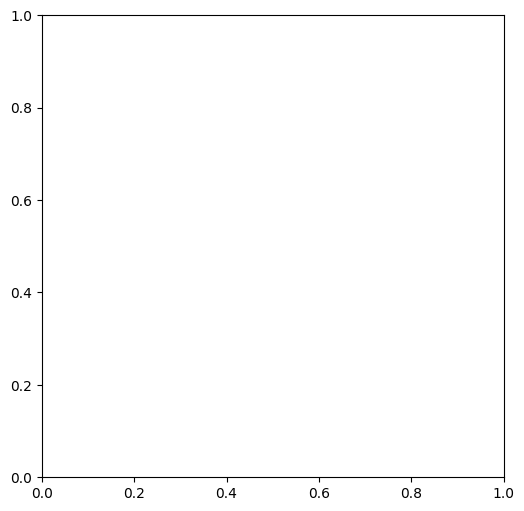

In [6]:
plt.figure(figsize=(8, 6))
plt.pie(portfolio.values(), labels=portfolio.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Composition")
plt.savefig("./data/portfolio_pie_chart.png")
plt.close()
